# Prereading

## Smoothing Matrices

The least squares estimate $\hat \beta = (X^TX)^{-1}X^Ty$ provides $X\hat \beta = X(X^TX)^{-1}X^Ty = H_{n \times n}y = \hat y \approx y$  where the exactness of the approximation is determined by the (hopefully somewhat familar) $H_{n \times n}$ **hat matrix**.

The **hat matrix** is determined by the choice of ***basis functions*** defining the **design matrix** $X$, e.g., 

$$X\beta = \underset{\text{traditional modeling}}{\left(\beta_0 + \sum_ j \beta_{j}x_j + \sum_ j \beta_{p+1+j}x_j^2 + \cdots\right)} \quad \text{ or } \quad \underset{\text{B-spline modeling}}{X\beta = \beta_0 + \sum_j \sum_k \beta_{jk} b_{jk}(x_j)}$$

Alternatively however, the **hat (projection) matrix** $H$ may be replaced with ***smoothing matrix*** $S$ parameterized by ***positive definite*** $A$ and ***penalty parameter*** $\lambda$ such that

$$\hat y = \underbrace{(I + \lambda A)^{-1}}_{S_{n \times n}} y \quad y^T A y \geq 0, \lambda \geq 0 $$

which makes $\hat y_i$ a weighted linear combination of $y_i$ and all $y_{j \not = i}$ and which also solves the **penalized least squares** problem

$$\nabla_{\hat y} \left(\underset{\text{$\hat y_i$ with close $x_i$ should be close}}{\overset{\text{Penalized Least Squares: $A$ means}}{(y-\hat y)^T(y-\hat y) + \lambda \hat y^T \!\!A \hat y}} \right) = -2y + 2\hat y + 2 \lambda A \hat y = 0$$

### LOESS, LOWESS, and cubic smoothing splines

[LOESS and LOWESS](https://en.wikipedia.org/wiki/Local_regression) and [cubic smoothing splines](https://en.wikipedia.org/wiki/Smoothing_spline#Derivation_of_the_cubic_smoothing_spline)  implicitly induce a smoothing matrix $S$ based on local averaging which makes $\hat y_i$ a weighted linear combination of $y_i$ and all $y_{j \not = i}$ on the basis of weights which decay as the distance beween features $\mathbf x_i$ and $\mathbf x_{j \not = i}$ increases. 

Since the weights decay to $0$, the application of the **smoothing matrix** to $y$ is naturally [sparse matrix](https://en.wikipedia.org/wiki/Sparse_matrix) operation.
Both **LOESS and LOWESS** use locally-weighted polynomial regression, so each $\hat y_i$ has an interpretation as a weightd least squares estimate 

$$(X^TW_iX)^{-1} XW_iy$$

**Cubic smoothing splines** are defined as  

$${f}_\lambda = \underset{ f}{\text{argmin}} \sum _{i=1}^{n}\{y_{i}-{ {f}}(x_{i})\}^{2}+\lambda \int { {f}}''(x)^{2}\,dx$$

and their name from the fact their optimal solution for each $\lambda$ is actually a [natural cubic spline](https://en.wikipedia.org/wiki/Spline_(mathematics)#Algorithm_for_computing_natural_cubic_splines) (with knots $z_i$ at every observed value of $x_i$ and third-order coefficients whose magnitudes are penalized by $\lambda$). 


In [3]:
from sklearn.datasets import fetch_california_housing
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')

In [4]:
housing = fetch_california_housing()
y = housing.target
x = range(0, len(y))


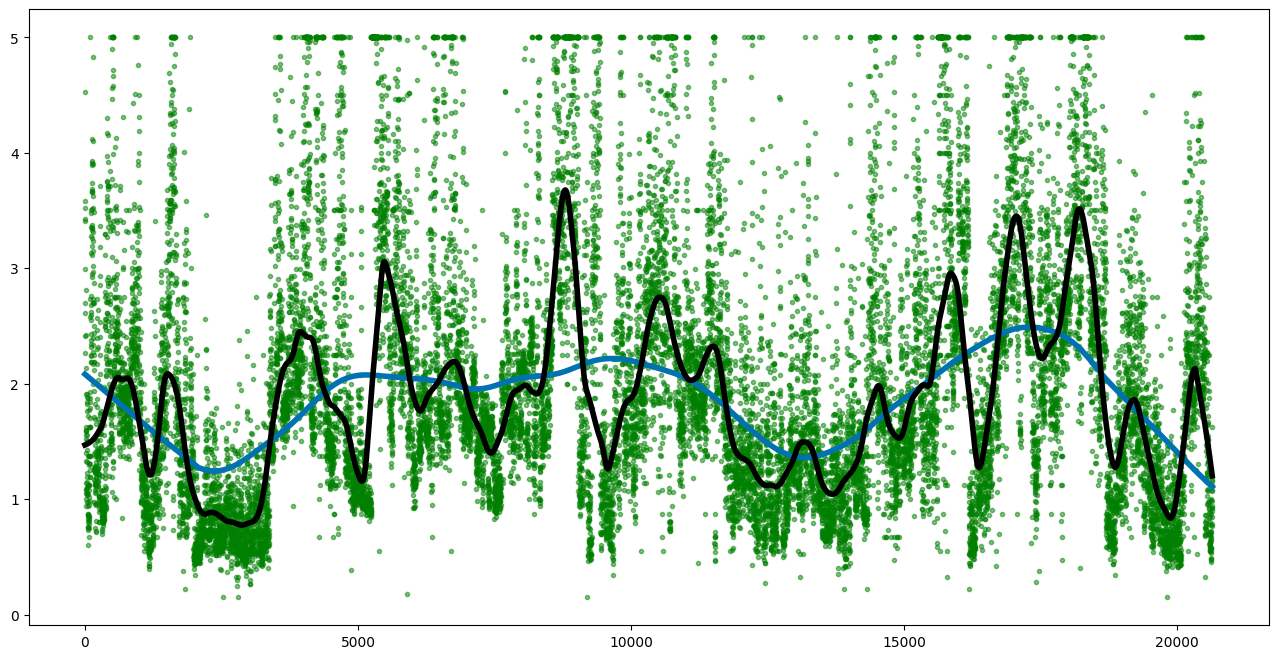

In [6]:
lowess = sm.nonparametric.lowess
plt.figure(figsize=(16,8))
plt.plot(x, y, '.', c='g', alpha=0.5)
z = lowess(y, x, frac=20/100)
plt.plot(*z.T, linewidth=4)
z = lowess(y, x, frac=3/100)
plt.plot(*z.T, c='k', linewidth=4);

## Smoothing matrix basis function representations

**Smoothing matrices** $S$ can be seen to be **idempotent** (so $SS=S$) whenever $A \hat y = 0$ by the **Sherman-Morrison-Woodbury** (matrix inversion) formula

$$SS y  =  S \hat y = (\underset{\,\large A + UCV}{I + 1 \lambda A})^{−1} \hat y = \left[ I − (\lambda^{-1} + A)^{−1} A \right] \hat y \overset{A \hat y= 0}{=} \hat y = S y $$

An **idempotent** matrix has only $0$ or $1$ valued **eigenvalues** $\lambda_i$,
and thus the **rank** of **smoothing matrix** $S$ can be measured as $\textrm{trace}(S) = \sum \lambda_i$. 

> More generally, **eigenvalues** of a **smoothing matrix** will satisfy $-1 < \lambda_i \leq 1$ with $\lambda_j = 1$ for at least one $j$.

Unlike the **hat matrix** $H$, the **smoothing matrix** $S$ is not necessarily **symmetric** but if it is is both  **symmetric** and **idempotent** then it is also a **projection matrix** (like $H$).  The **hat matrix** spans (projects onto) the range (column space) of $X$, whereas a  **symmetric idempotent smoothing matrix** $S_{n\times n} = (I + \lambda A)^{-1} = V_{n\times p}D_{p\times p}V_{n\times p}^T$ then spans the range of the columns of $V$ and $\hat y$ is given by the coordinate $\tilde \beta_{p\times 1} = D_{p\times p}V_{n\times p}^Ty$ with respect to the basis formed by the columns of $V$.






# Lecture

First hour of class

## Splines versus smoothing matrices

---

Even though the optimal function ${f}_\lambda$ for **cubic smoothing splines** is a **natural cubic spline**, it is not the projection of **hat matrix** $H = X(X^TX)^{-1}X^T$ resulting from some **design matrix** $X$ constructed from **natural cubic spline basis functions**.

**Cubic smoothing splines** use $n$ knots which would produce more parameters than data points, so the **hat matrix** $H$ would then perfectly fit (and **interpolate**) the data corresponding to a ***cubic smoothing splines*** with $\lambda = 0$ which induces no penalization on the magnitude third-order coefficients.

- The **cubic smoothing splines** fit is the function ${f}_\lambda$ which is a **natural cubic spline** which performs the **data smoothing** $\hat y = {(I + \lambda A)^{-1}} y$
which is the solution to a ***penalized least squares*** problem 
$(y^T A y \geq 0, \lambda \geq 0)$.

Specifying a design matrix based on **splines**, such as **natural cubic splines** is another way to peform **data smoothing**. But it is not based on a **smoothing matrix** $S$ but on a **design matrix** $X$ which implies a **hat matrix** solving a **least squares** problem $\hat y = Hy = X(X^TX)^{-1}X^Ty$. 

> **Smoothing matrices** induce an optimal solution to a **penalized least squares** problem, while **spline basis functions** specify a **least squares** problem. 

## Spline Basis Functions 

### Truncated Power Functions

The **monomials** are the most obvious **basis functions**
that can be considered to expland the (functional) representational capabilities of a linear model.  

A natural expansion of this (functional) **basis** are the so-called **truncated power functions** which allow a linear model to represent

- **smooth** ($p-1$ times [**continuously differentiable**](https://en.wikipedia.org/wiki/Smoothness))
- **piecewise polynomials** of order $p$ 

\begin{align*}
  f(x) \approx \hat f(x) = {}& \sum_{j=0}^{p+k} \beta_j b_j(x)\\
  \{b_j(x): j=0, \cdots, p+k\} = {}& \{1, x, x^2, \cdots , x^p, (x-z_1)^p_+, \cdots , (x-z_k)^p_+\}\\
\text{where } y^p_+ = {}& \left \{ \begin{array}{rl}y^p&y> 0 \\0 & y \leq 0\end{array} \right .
  \end{align*}

For a sufficient number of well-chosen **knots** $z_j$, this **basis** can provide good approximations for many functions. 

For example, **cubic-splines** with $p=3$ and reasonable ***knots*** are smooth but do not oscilate during **extrapolation** and **interpolation** (like high order polynomials); and, if the second derivative is set to $0$ outside the **knots** so the function is linear outside the knots, then the resulting function generally appears "natural" to the human eye (and thus this latter formulation is the previously alluded to **natural cubic-splines**). 

### B-spline basis functions

**Truncated power functions** are usually dismissed in favor of **B-spline basis functions** beacause **B-spline**

- provide the same smoothness and piecewise polynomial behavior
- but due to their more "balanced" and "locally nonzero" nature they protective against **multicollinearity** and hence
    - produce **design matrices** $X$ with a better distribution of **singular values** 
    - and thus provide lower **condition numbers** and improved numerical stability. 
**Truncated power functions** on the other hand

- are powers of $x$ that can be correlated,
- and are exactly equal to each other for $x$ less than their corresponding $x<z_j$ truncation   
    


In [8]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from patsy import dmatrix, bs, build_design_matrices
import statsmodels.api as sm
import pandas as pd
plt.style.use('seaborn-v0_8-colorblind')

[ 1  1  1 -1  1  2  1]


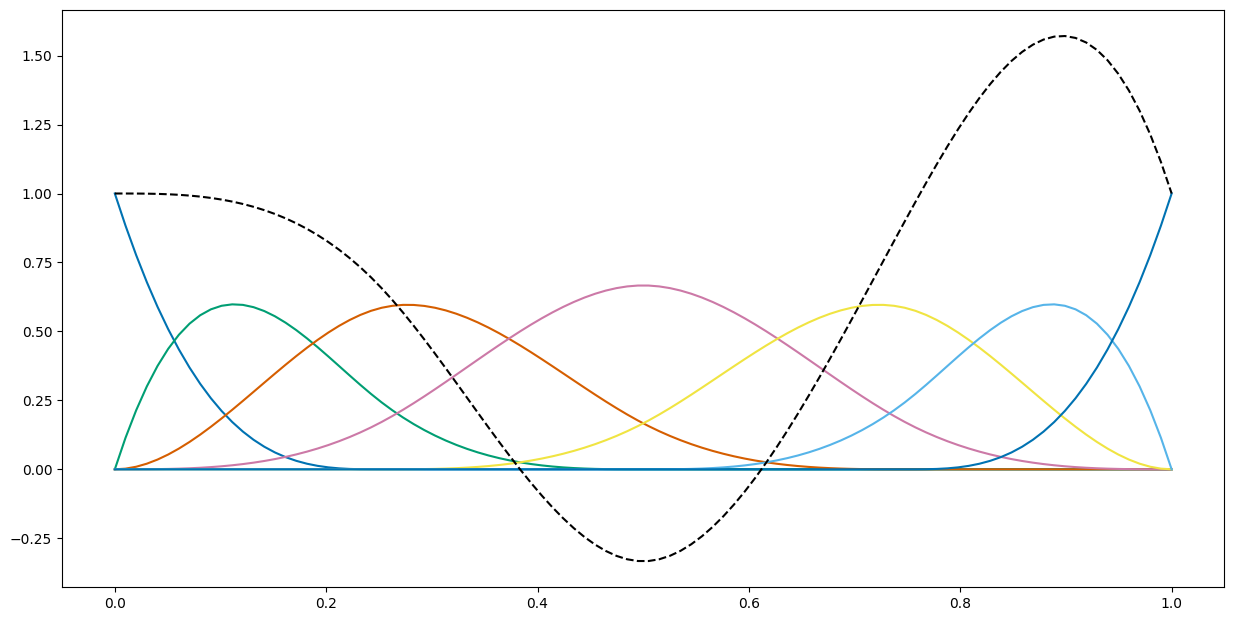

In [9]:
x = np.linspace(0., 1., 100)
y = dmatrix("bs(x, knots=[.25,.5,.75], degree=3, include_intercept=True) - 1", {"x": x})
Xs = np.asarray(build_design_matrices([y.design_info],  {"x": x})[0])

b = np.array([1,1,1,-1,1,2,1])

plt.figure(figsize=(15,7.5))
plt.plot(x, Xs); plt.plot(x,np.dot(Xs,b),'k--')
print(b)

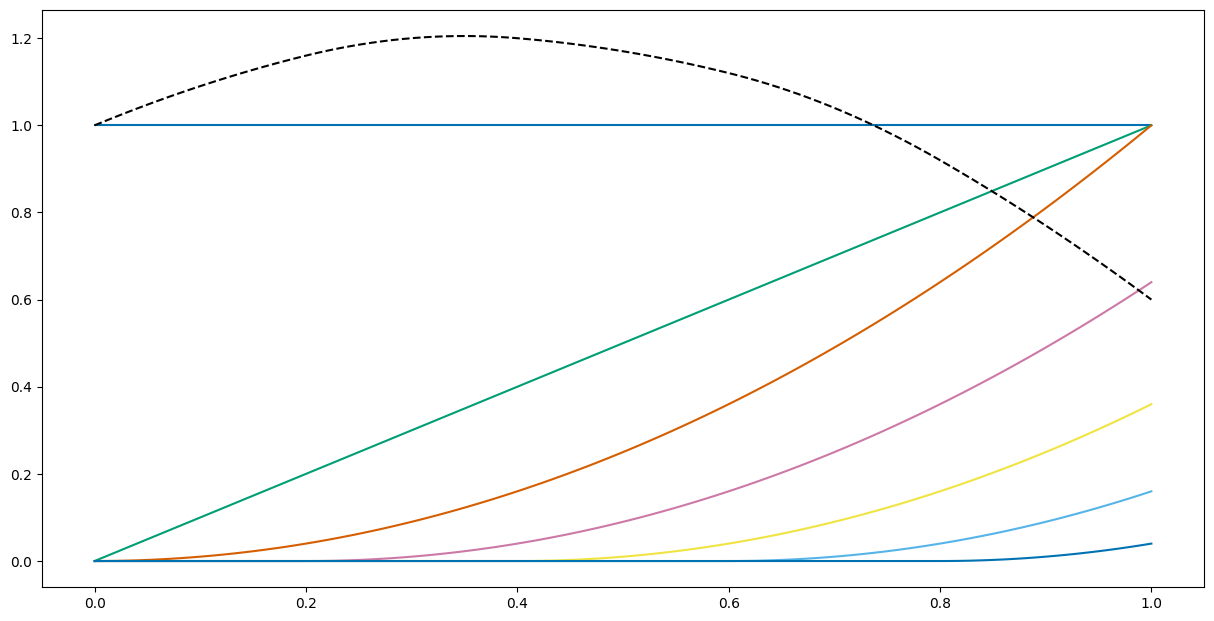

In [10]:
# compare against a truncated power function basis
x = np.linspace(0., 1., 100)
X = np.c_[1+0*x,x,x**2,(x>.2)*(x-.2)**2,(x>.4)*(x-.4)**2,(x>.6)*(x-.6)**2,(x>.8)*(x-.8)**2]

plt.figure(figsize=(15,7.5))
b = np.array([1,1,-1,-1,1,-1,1])
plt.plot(x, X); plt.plot(x,np.dot(X,b),'k--');

With corresponding condition numbers (indicating degree of multicollinearity)


/Users/scottschwartz/miniconda3/envs/STA410/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/scottschwartz/miniconda3/envs/STA410/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


(665254.087093306, 26.25957482808298)

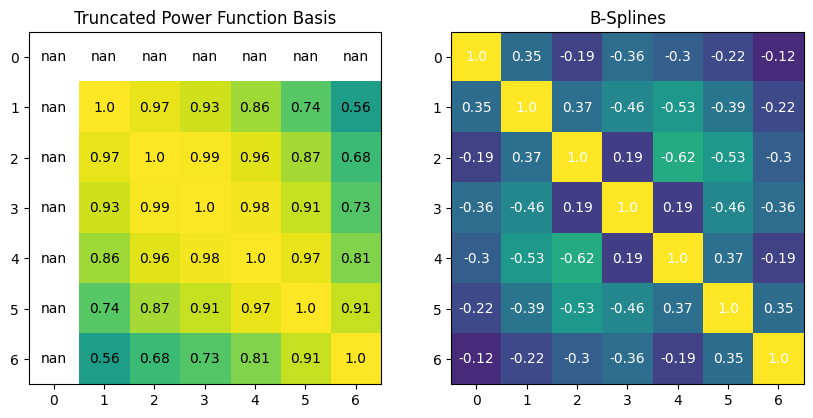

In [11]:
# Truncated Power Function Basis create correlated (multicollinaer) data
# while B-Splines create much more uncorrelated data
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(np.abs(np.corrcoef(X.T)),vmax=1,vmin=0)
ax[0].set_title("Truncated Power Function Basis")
for i in range(7):
    for j in range(7):
        ax[0].text(x=j, y=i, s=np.round(np.corrcoef(X.T),2)[i,j], horizontalalignment='center', verticalalignment='center')
ax[1].imshow(np.abs(np.corrcoef(Xs.T)),vmax=1,vmin=0)
for i in range(7):
    for j in range(7):
        ax[1].text(x=j, y=i, s=np.round(np.corrcoef(Xs.T),2)[i,j], color='white', horizontalalignment='center', verticalalignment='center')
_=ax[1].set_title("B-Splines")

print("With corresponding condition numbers (indicating degree of multicollinearity)")
np.linalg.cond(X)**2, np.linalg.cond(Xs)**2

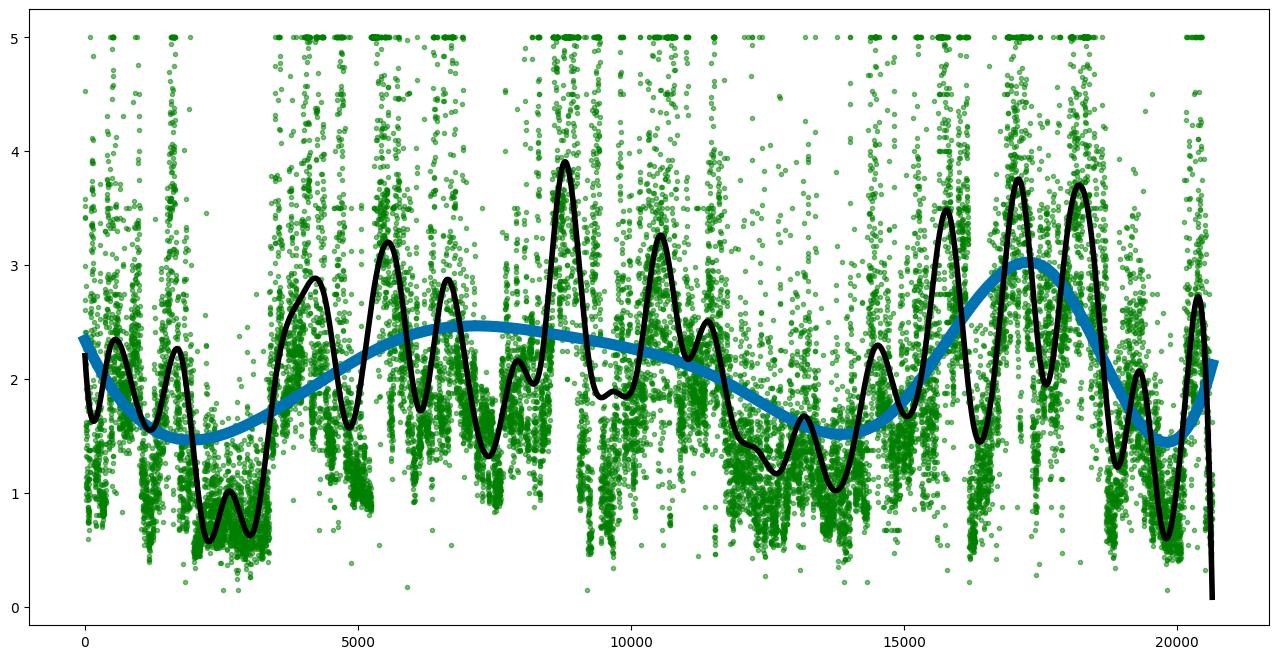

In [13]:
# https://www.datatechnotes.com/2021/11/scattered-data-spline-fitting-example.html
# boston = load_boston()
# y = boston.target
housing = fetch_california_housing()
y = housing.target
x = range(0, len(y))
# https://www.analyticsvidhya.com/blog/2018/03/introduction-regression-splines-python-codes/
# http://www.science.smith.edu/~jcrouser/SDS293/labs/lab13-py.html
bsv1 = dmatrix("bs(train, df=10, include_intercept=True)", 
                        {"train": x}, return_type='dataframe')
fit1 = sm.GLM(y, bsv1).fit()
bsv2 = dmatrix("bs(train, df=50, include_intercept=True)", 
                        {"train": x}, return_type='dataframe')
fit2 = sm.GLM(y, bsv2).fit()

plt.figure(figsize=(16,8))
plt.plot(x, y, '.', c='g', alpha=0.5)
plt.plot(x,fit1.predict(bsv1), linewidth=8)
plt.plot(x,fit2.predict(bsv2), c='k', linewidth=4);